In [10]:
#Importing all the required libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [11]:
#Load the dataset into the pandas dataframe
dataset = pd.read_csv("netflix_stock_price.csv")

dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


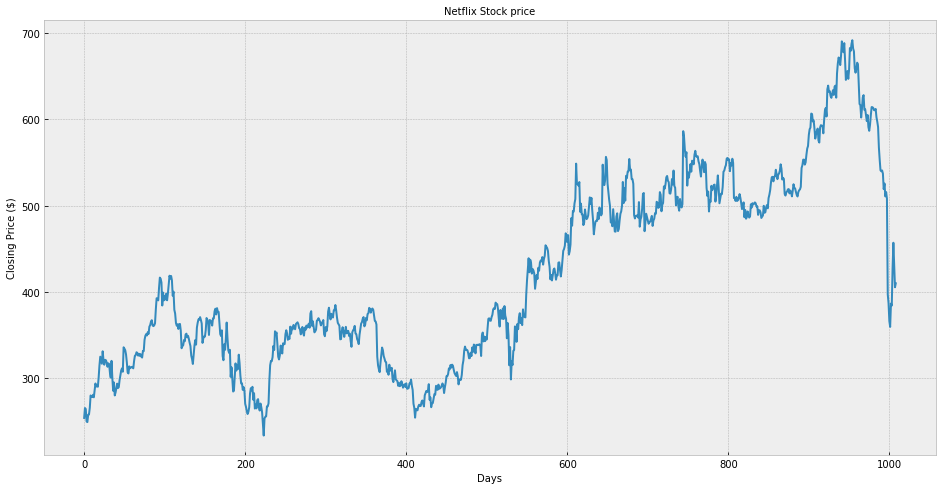

In [12]:
#lets visualize the current state of the data

plt.figure(figsize=(16,8))
plt.title('Netflix Stock price', fontsize = 10)
plt.xlabel('Days', fontsize= 10)
plt.ylabel('Closing Price ($)', fontsize = 10)
plt.plot(dataset['Close'])
plt.show()

In [13]:
dataset = dataset[['Close']]
dataset.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [14]:
#Create a variable to predict 'x' days out into the future
upcoming_days = 30

#Create a new column (the target or dependent variable) shifted 'x' units/days up
dataset['Prediction'] = dataset[['Close']].shift(-upcoming_days)

#print the last few rows
dataset.tail()

,Close,Prediction
1004,427.140015,NaN
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [15]:
#Create the feature data set and print it.

X = np.array(dataset.drop(['Prediction'], 1))[:-upcoming_days]
print(X)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [16]:
# Create the target data set and print it.
y = np.array(dataset['Prediction'])[:-upcoming_days]
print(y)

[317.5      316.480011 306.700012 300.940002 320.350006 300.690002
 285.769989 295.350006 280.290009 283.670013 288.940002 293.970001
 288.850006 289.929993 298.070007 303.670013 309.25     311.649994
 307.779999 336.059998 334.519989 332.700012 327.769989 318.690002
 307.019989 305.76001  313.980011 311.76001  312.459991 313.299988
 313.359985 311.690002 320.089996 326.26001  326.890015 330.299988
 329.600006 326.459991 328.529999 326.130005 328.190002 325.220001
 324.179993 331.820007 331.619995 344.720001 349.290009 351.290009
 349.730011 353.540009 351.600006 359.929993 361.809998 365.799988
 367.450012 361.399994 360.570007 361.450012 363.829987 379.929993
 392.869995 391.980011 390.399994 404.980011 416.76001  415.440002
 411.089996 384.480011 399.390015 390.390015 395.420013 391.429993
 398.179993 390.519989 398.390015 408.25     418.970001 415.630005
 418.649994 413.5      395.799988 400.480011 379.480011 375.130005
 364.230011 361.049988 362.660004 357.320007 362.869995 363.08

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [19]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [22]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = dataset.drop(['Prediction'], 1)[:-upcoming_days]
#Get the last 'x' rows
x_future = x_future.tail(upcoming_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


array([[646.909973],
       [657.580017],
       [682.609985],
       [679.330017],
       [687.400024],
       [691.690002],
       [682.02002 ],
       [678.799988],
       [659.200012],
       [654.059998],
       [658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ]])

In [23]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[614.090027 613.119995 610.710022 610.539978 612.090027 602.440002
 597.369995 610.539978 567.52002  553.289978 541.059998 539.849976
 611.       617.77002  525.690002 525.690002 510.799988 515.859985
 654.059998 397.5      387.149994 366.420013 359.700012 653.159973
 384.359985 427.140015 671.659973 429.480011 384.359985 682.609985]

[624.8737733  634.2509401  656.24805513 653.36551715 660.45769051
 664.22785671 655.72957552 652.89971116 635.67464214 631.15743784
 634.87487593 641.33431724 639.75243176 620.47087416 599.26467552
 598.12215199 585.51974349 594.80019757 606.128344   608.32542182
 593.3149712  593.89497602 587.65529698 581.88136944 588.07711835
 575.79107675 571.98572214 578.14633714 587.971663   596.16237527]


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


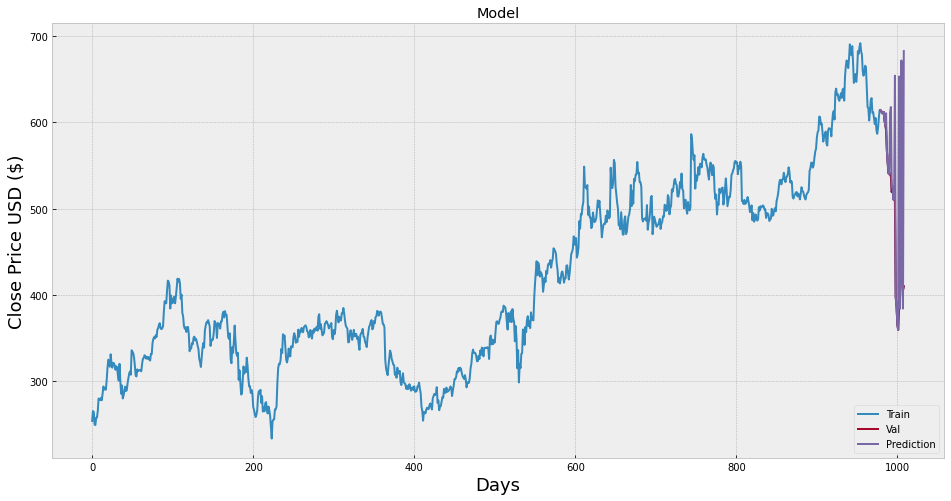

In [28]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  dataset[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(dataset['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


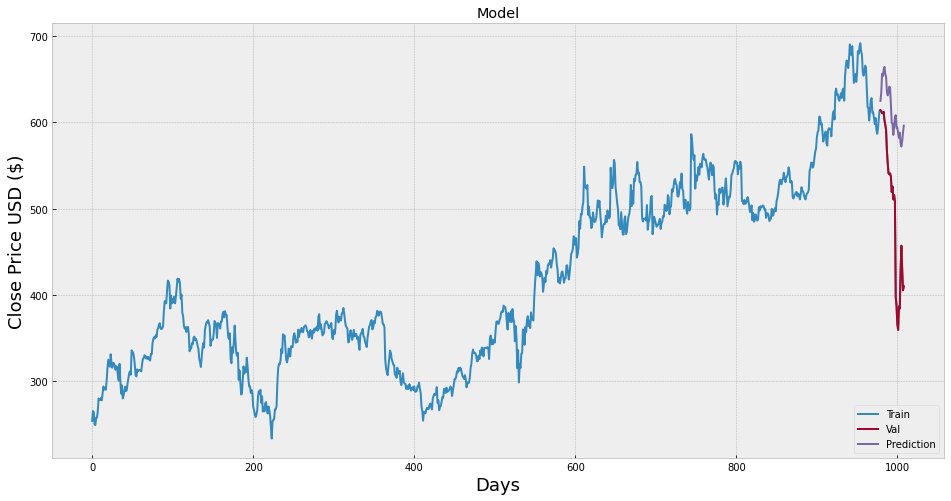

In [30]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  dataset[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(dataset['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

In [ ]:
Based solely on these two graphs and no additional performance indicators I believe the Decision Tree model outperformed 
the Linear Regression model, although both appear to be pretty bad. 
I'll have to work on improving these models or devising a new technique.